# Prática 03 - Uma Introdução Simples ao *pandas* 

**Pandas** é uma biblioteca Python que fornece ferramentas de análise de dados e estruturas de dados de alta performance e *fáceis de usar*. Por ser a principal e mais completa biblioteca para estes objetivos, **pandas** é fundamental para análise de dados com Python.

Esta introdução foi escrita como uma alternativa em português às introduções já existentes e à [introdução de 10 minutos apresentada na documentação oficial](http://pandas.pydata.org/pandas-docs/stable/10min.html), e tem por objetivo fornecer de forma enxuta e simplificada uma apresentação básica às principais ferramentas fornecidas pelo **pandas**, cobrindo manipulação, leitura e visualização de dados, contudo também farei outros comentários pontuais por julgar necessário, como por exemplo uma breve explicação sobre arquivos *.csv*. A introdução pressupõe apenas conhecimento básico em Python.

Vamos começar com as importações, usaremos além do pandas, o numpy, biblioteca para computação científica e o matplotlib, biblioteca principal para visualização de dados, entretanto, como veremos mais adiante, o próprio pandas nos fornece facilidades em relação à visualização de dados, com métodos construídos com base no matplotlib, também importamos esta biblioteca para, além de poder modificar esteticamente nossos gráficos, facilitar a exibição dos gráficos.
A linha `%matplotlib inline` faz parte da mágica do Jupyter e você não deve rodá-la caso esteja em outra IDE/Ambiente.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Existem dois tipos principais de estruturas de dados no pandas:
 1. **Series** 
 1. **DataFrame**

Uma Series é como um array unidimensional, uma lista de valores. Toda Series possui um índice, o `index`, que dá rótulos a cada elemento da lista. Abaixo criamos uma Series `notas`, o `index` desta Series é a coluna à esquerda, que vai de 0 a 4 neste caso, que o pandas criou automaticamente, já que não especificamos uma lista de rótulos.

In [22]:
notas = pd.Series([2,7,5,10,6])
notas

0     2
1     7
2     5
3    10
4     6
dtype: int64

Já podemos aqui verificar os atributos da nossa Series, comecemos pelos valores e o índice, os dois atributos *fundamentais* nesta estrutura:

In [23]:
notas.values

array([ 2,  7,  5, 10,  6])

In [24]:
notas.index

RangeIndex(start=0, stop=5, step=1)

Como ao criar a Series não demos um índice específico o pandas usou os inteiros positivos crescentes como padrão. Pode ser conveniente atribuirmos um índice diferente do padrão, supondo que essas sejam notas de uma turma, poderíamos atribuir nomes ao index:

In [25]:
notas = pd.Series([2,7,5,10,6], index=["Wilfred", "Abbie", "Harry", "Julia", "Carrie"])
notas

Wilfred     2
Abbie       7
Harry       5
Julia      10
Carrie      6
dtype: int64

O index nos ajuda para referenciar um determinado valor, ele nos permite acessar os valores pelo seu rótulo:

In [26]:
notas["Julia"]

10

Outra facilidade proporcionada pela estrutura são seus métodos que fornecem informações estatísticas sobre os valores, como **média** `.mean()` e **desvio padrão** `.std()`. Encorajo o leitor(a) a investigar e verificar alguns dos métodos e atributos da estrutura usando o `TAB` para auto-completação na shell do Python, ou simplesmente checar a completíssima [documentação oficial](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series) deste objeto.

In [27]:
print("Média:", notas.mean())
print("Desvio padrão:", notas.std())

Média: 6.0
Desvio padrão: 2.9154759474226504


Geralmente para resumir brevemente as estatísticas dos dados se usa o `.describe()`

In [28]:
notas.describe()

count     5.000000
mean      6.000000
std       2.915476
min       2.000000
25%       5.000000
50%       6.000000
75%       7.000000
max      10.000000
dtype: float64

A estrutura é flexível o suficiente pra aplicarmos algumas expressões matemáticas e funções matemáticas do numpy diretamente:

In [29]:
notas**2

Wilfred      4
Abbie       49
Harry       25
Julia      100
Carrie      36
dtype: int64

In [30]:
np.log(notas)

Wilfred    0.693147
Abbie      1.945910
Harry      1.609438
Julia      2.302585
Carrie     1.791759
dtype: float64

Já um DataFrame é uma estrutura bidimensional de dados, como uma planilha. Abaixo criaremos um DataFrame que possui valores de diferentes tipos, usando um dicionário como entrada dos dados:

In [31]:
df = pd.DataFrame({'Aluno' : ["Wilfred", "Abbie", "Harry", "Julia", "Carrie"],
                   'Faltas' : [3,4,2,1,4],
                   'Prova' : [2,7,5,10,6],
                   'Seminário': [8.5,7.5,9.0,7.5,8.0]})
df

,Aluno,Faltas,Prova,Seminário
0,Wilfred,3,2,8.5
1,Abbie,4,7,7.5
2,Harry,2,5,9.0
3,Julia,1,10,7.5
4,Carrie,4,6,8.0


Os tipos de dados que compõe as colunas podem ser verificados por um método próprio:

In [32]:
df.dtypes

Aluno         object
Faltas         int64
Prova          int64
Seminário    float64
dtype: object

É possível acessar a lista de colunas de forma bem intuitiva:

In [33]:
df.columns

Index(['Aluno', 'Faltas', 'Prova', 'Seminário'], dtype='object')

Os nomes das colunas podem ser usadas pra acessar seus valores:

In [34]:
df["Seminário"]

0    8.5
1    7.5
2    9.0
3    7.5
4    8.0
Name: Seminário, dtype: float64

Para DataFrames, `.describe()` também é uma boa forma de verificar resumidamente a disposição estatística dos dados numéricos:

In [35]:
df.describe()

,Faltas,Prova,Seminário
count,5.00000,5.000000,5.00000
mean,2.80000,6.000000,8.10000
std,1.30384,2.915476,0.65192
min,1.00000,2.000000,7.50000
25%,2.00000,5.000000,7.50000
50%,3.00000,6.000000,8.00000
75%,4.00000,7.000000,8.50000
max,4.00000,10.000000,9.00000


Outra tarefa comum aplicada em DataFrames é ordená-los por determinada coluna:

In [36]:
df.sort_values(by="Seminário")

,Aluno,Faltas,Prova,Seminário
1,Abbie,4,7,7.5
3,Julia,1,10,7.5
4,Carrie,4,6,8.0
0,Wilfred,3,2,8.5
2,Harry,2,5,9.0


Note que simplesmente usar o método `sort_values` não modifica o nosso DataFrame original:

In [37]:
df

,Aluno,Faltas,Prova,Seminário
0,Wilfred,3,2,8.5
1,Abbie,4,7,7.5
2,Harry,2,5,9.0
3,Julia,1,10,7.5
4,Carrie,4,6,8.0


Outra forma de visualizar valores ordenados utiliza o método `style.background_gradient`, destacando os valores com escala de cores, conforme o exemplo a seguir:

In [38]:
df.sort_values(by=["Prova"], ascending=False).style.background_gradient(cmap='Reds')

,Aluno,Faltas,Prova,Seminário
3,Julia,1,10,7.500000
1,Abbie,4,7,7.500000
4,Carrie,4,6,8.000000
2,Harry,2,5,9.000000
0,Wilfred,3,2,8.500000


Muitas vezes é necessário selecionarmos valores específicos de um DataFrame, seja uma linha ou uma célula específica, e isso pode ser feito de diversas formas. A documentação oficial contém [vasta informação](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) para esse tipo de tarefa, aqui nos concentraremos nas formas mais comuns de selecionarmos dados.

Para selecionar pelo index ou rótulo usamos o atributo `.loc`:

In [39]:
df.loc[3]

Aluno        Julia
Faltas           1
Prova           10
Seminário      7.5
Name: 3, dtype: object

Para selecionar de acordo com critérios condicionais, se usa o que se chama de **Boolean Indexing**.

Suponha que queiramos selecionar apenas as linhas em que o valor da coluna *Seminário* seja acima de 8.0, podemos realizar esta tarefa passando a condição diretamente como índice:

In [40]:
df[df["Seminário"] > 8.0]

,Aluno,Faltas,Prova,Seminário
0,Wilfred,3,2,8.5
2,Harry,2,5,9.0


Este tipo de indexação também possibilita checar condições de múltiplas colunas. Diferentemente do que estamos habituados em Python, aqui se usam operadores bitwise, ou seja, `&`, `|`, `~` ao invés de `and`, `or`, `not`, respectivamente. Suponha que além de `df["Seminário"] > 8.0` queiramos que o valor da coluna `Prova` não seja menor que 3:

In [41]:
df[(df["Seminário"] > 8.0) & (df["Prova"] > 3)]

,Aluno,Faltas,Prova,Seminário
2,Harry,2,5,9.0


Por enquanto é isso para manipulação de Series e DataFrames, conforme a seção de leitura de dados for se estendendo irei aprensentar alguns outros métodos dessas estruturas que poderão ser interessantes no contexto.
Na seção anterior vimos como manipular dados que foram criados durante esta apresentação, acontece que, na maioria das vezes, queremos analisar dados que já estão prontos.
O pandas nos fornece uma série de funcionalidades de leitura de dados, pros mais diversos formatos estruturais de dados, experimente a auto-completação de `pd.read_<TAB>`, entre eles estão:
 1. `pd.read_csv`, para ler arquivos .csv, formato comum de armazenar dados de tabelas
 1. `pd.read_xlsx`, para ler arquivos Excel .xlsx, é necessário instalar uma biblioteca adicional pra esta funcionalidade.
 1. `pd.read_html`, para ler tabelas diretamente de um website
 
Usaremos para analisar dados externos nesta introdução o `.read_csv`, pois é neste formato que se encontram nossos dados. CSV, ou comma-separated values é um formato muito comum de dados abertos, trata-se, como a sigla sugere, de valores divididos por vírgula, apesar de o caracter separador poder ser o ponto-e-vírgula ou outro.

O arquivo `dados.csv` está na mesma pasta do nosso script, então podemos passar como argumento do `.read_csv` apenas o seu nome. Outro argumento interessante da função é o `sep`, que por padrão é a vírgula, mas que pode ser definido como outro caractere caso seu dado esteja usando outro separador.

Estes dados que usaremos como exemplo são dados sobre preços de apartamentos em 7 bairros da cidade do Rio de Janeiro: Botafogo, Copacabana, Gávea, Grajaú, Ipanema, Leblon, Tijuca. São dados adaptados de um arquivo que pode ser encontrado [aqui](https://www.kaggle.com/rbarbera/rio-brasil-modelo-preditivo-precos-imoveis/data).

In [42]:
df = pd.read_csv("dados.csv")
df

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,12031.25
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55
...,...,...,...,...,...,...,...,...
1992,1080,3,1.0,1.0,80,Tijuca,680000,8500.00
1993,750,3,0.0,1.0,82,Tijuca,650000,7926.83
1994,700,3,1.0,1.0,100,Tijuca,629900,6299.00
1995,1850,3,1.0,2.0,166,Tijuca,1600000,9638.55


Como esperado, o DataFrame tem muitas linhas de dados, pra visualizar sucintamente as primeiras linhas de um DataFrame existe o método `.head()`

In [43]:
df.head()

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,12031.25
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


Por padrão `.head()` exibe as 5 primeiras linhas, mas isso pode ser alterado:

In [44]:
df.head(n=10)

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,12031.25
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55
5,917,1,1.0,1.0,60,Botafogo,630000,10500.00
6,850,1,1.0,1.0,65,Botafogo,740000,11384.62
7,350,1,1.0,1.0,43,Botafogo,570000,13255.81
8,440,1,1.0,1.0,26,Botafogo,430000,16538.46
9,510,1,1.0,1.0,42,Botafogo,500000,11904.76


Similarmente existe o `.tail()`, que exibe por padrão as últimas 5 linhas do DataFrame:

In [45]:
df.tail()

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
1992,1080,3,1.0,1.0,80,Tijuca,680000,8500.00
1993,750,3,0.0,1.0,82,Tijuca,650000,7926.83
1994,700,3,1.0,1.0,100,Tijuca,629900,6299.00
1995,1850,3,1.0,2.0,166,Tijuca,1600000,9638.55
1996,800,3,1.0,1.0,107,Tijuca,540000,5046.73


Além de confiar em mim, quando mencionei os bairros que continham no nosso conjunto de dados, você pode verificar a informação usando um método que lista os valores únicos numa coluna:

In [46]:
df["bairro"].unique()

array(['Botafogo', 'Copacabana', 'Gávea', 'Grajaú', 'Ipanema', 'Leblon',
       'Tijuca'], dtype=object)

Também parece interessante verificarmos a hegemoneidade da nossa amostra em relação aos bairros. Pra tarefas de contar valores podemos sempre aproveitar de outro método disponível, o `.value_counts()`, também veremos um pouco mais abaixo como visualizar estes valores em forma de gráfico de barras.

In [47]:
df["bairro"].value_counts()

Copacabana    346
Tijuca        341
Botafogo      307
Ipanema       281
Leblon        280
Grajaú        237
Gávea         205
Name: bairro, dtype: int64

Os valores contados também podem ser normalizados para expressar porcentagens:

In [48]:
df["bairro"].value_counts(normalize=True)

Copacabana    0.173260
Tijuca        0.170756
Botafogo      0.153731
Ipanema       0.140711
Leblon        0.140210
Grajaú        0.118678
Gávea         0.102654
Name: bairro, dtype: float64

Agrupar os dados se baseando em certos critérios é outro processo que o pandas facilita bastante com o `.groupby()`.
Esse método pode ser usado para resolver os mais **amplos** dos problemas, aqui abordarei apenas o agrupamento simples, a divisão de um DataFrame em grupos.

Abaixo agrupamos o nosso DataFrame pelos valores da coluna `"bairro"`, e em seguida aplicamos o `.mean()` para termos um objeto GroupBy com informação das médias agrupadas pelos valores da coluna bairros. 

In [49]:
df.groupby("bairro").mean()

,condominio,quartos,suites,vagas,area,preco,pm2
bairro,,,,,,,
Botafogo,914.475570,2.107492,1.048860,1.159609,83.837134,1.010614e+06,12034.486189
Copacabana,991.861272,2.101156,1.034682,1.080925,101.855491,1.216344e+06,11965.298699
Grajaú,619.940928,2.097046,0.970464,1.130802,79.949367,4.788869e+05,6145.624473
Gávea,985.234146,2.058537,1.029268,1.200000,88.497561,1.454571e+06,16511.582780
Ipanema,1357.120996,2.181495,1.192171,1.220641,100.615658,2.033096e+06,19738.407794
Leblon,1260.010714,2.207143,1.064286,1.164286,91.832143,1.946193e+06,20761.351036
Tijuca,681.175953,2.131965,0.944282,1.143695,81.457478,5.750780e+05,7149.804985


Para extrairmos dados de uma coluna deste objeto basta acessá-lo convencionalmente, para obtermos os valores da média do preço do metro quadrado em ordem crescente, por exemplo:

In [50]:
df.groupby("bairro").mean()["pm2"].sort_values()

bairro
Grajaú         6145.624473
Tijuca         7149.804985
Copacabana    11965.298699
Botafogo      12034.486189
Gávea         16511.582780
Ipanema       19738.407794
Leblon        20761.351036
Name: pm2, dtype: float64

É comum queremos aplicar uma função qualquer aos dados, ou à parte deles, neste caso o pandas fornece o método `.apply`. Por exemplo, para deixar os nomes dos bairros como apenas as suas três primeiras letras:

In [51]:
def truncar(bairro):
    return bairro[:3]

df["bairro"].apply(truncar)

0       Bot
1       Bot
2       Bot
3       Bot
4       Bot
       ... 
1992    Tij
1993    Tij
1994    Tij
1995    Tij
1996    Tij
Name: bairro, Length: 1997, dtype: object

Ou de um jeito mais prático, usando uma função lambda:

In [52]:
df["bairro"].apply(lambda x: x[:3])

0       Bot
1       Bot
2       Bot
3       Bot
4       Bot
       ... 
1992    Tij
1993    Tij
1994    Tij
1995    Tij
1996    Tij
Name: bairro, Length: 1997, dtype: object

Uma das tarefas na qual o pandas é reconhecidamente poderoso é a habilidade de tratar dados incompletos.
Por muitos motivos pode haver incompletude no dataset, o `np.nan` é um valor especial definido no Numpy, sigla para Not a Number, o pandas preenche células sem valores em um DataFrame lido com `np.nan`.

Vamos criar um novo dataframe usando as 5 primeiras linhas do nosso original, usando o já visto `.head()`. Abaixo é usado o `.replace` para substituir um valor específico por um `NaN`. 

In [53]:
df2 = df.head()
df2 = df2.replace({"pm2": {12031.25: np.nan}})
df2

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,NaN
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


O pandas simplifica a remoção de quaiquer linhas ou colunas que possuem um `np.nan`, por padrão o `.dropna()` retorna as linhas que não contém um NaN:

In [54]:
df2.dropna()

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


Preencher todos os valores NaN por um outro específico também é bastante simples:

In [55]:
df2.fillna(99)

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,99.00
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


Acaba sendo muitas vezes conveniente termos um método que indica quais valores de um dataframe são NaN e quais não são:

In [56]:
df2.isna()

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


Partiremos agora para visualização de dados com o pandas. Os métodos de visualização do pandas são construídos com base no matplotlib para exploração rápida dos dados. Para se ter mais liberdade no conteúdo e possibilidades de visualização se recomenda usar diretamente o matplotlib ou ainda, para visualização estatística, o seaborn. 
Nesta introdução tratarei apenas dos métodos de visualização incluídos no pandas, que por outro lado, oferece uma sintaxe bastante simples para realizar a tarefa.

Comecemos verificando que tanto Series como DataFrame possuem um método `.plot()` que também é um atributo e pode ser encadeado para gerar visualização de diversos tipos, como histograma, área, pizza e dispersão, com respectivamente  `.hist()`, `.area()`, `.pie()` e  `.scatter()`, além de vários [outros](https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting).

Vamos verificar a distribuição dos preços usando o encadeamento `.plot.hist()`, o eixo x, que é o preço, está numa escala de \*10^7, como mostrado na imagem:

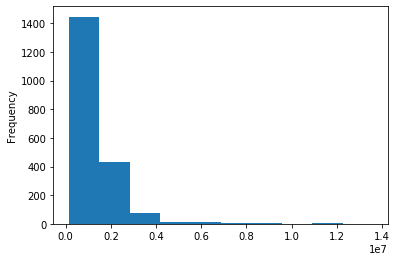

In [57]:
df["preco"].plot.hist()

Por padrão esse método usa 10 bins, ou seja, divide os dados em 10 partes, mas é claro que podemos especificar um valor para a plotagem. Abaixo, além de especificar a quantidade de bins, também especifiquei a cor das bordas como preta, que por padrão é transparente.

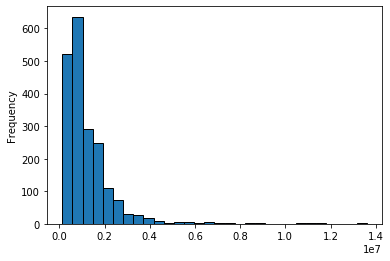

In [58]:
df["preco"].plot.hist(bins=30, edgecolor='black')

Podemos usar os valores de contagem de cada bairro como exemplo de dado para um plot tanto de barras verticais quando de barras horizontais, para verificar visualmente esses dados:

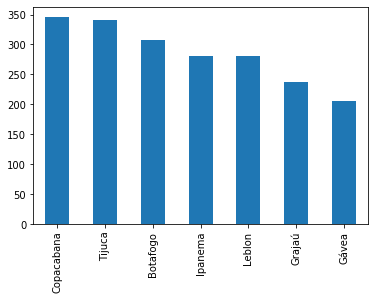

In [59]:
df["bairro"].value_counts().plot.bar()

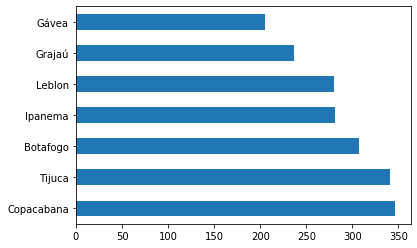

In [60]:
df["bairro"].value_counts().plot.barh()

Os métodos são flexíveis o suficiente para aceitarem argumentos como um título para a imagem:

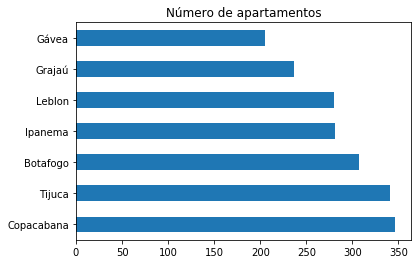

In [61]:
df["bairro"].value_counts().plot.barh(title="Número de apartamentos")

Um gráfico de dispersão usando um DataFrame pode ser usado especificando-se quais colunas usar como dados no eixo x e y:

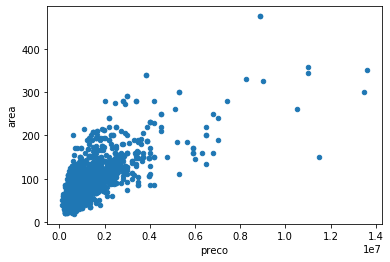

In [62]:
df.plot.scatter(x='preco', y='area')

Para fins estéticos, o matplotlib fornece uma série de styles diferentes que podem ser usados, um deles é o ggplot

In [63]:
plt.style.use('ggplot')

Agora este estilo será usado em todas as imagens geradas após essa linha

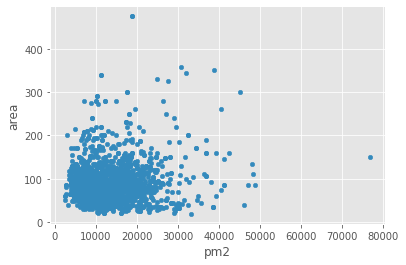

In [64]:
df.plot.scatter(x='pm2', y='area')

A lista de estilos disponíveis pode ser vista através de um método próprio

In [65]:
plt.style.available

['seaborn-dark-palette',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn',
 'seaborn-ticks',
 'tableau-colorblind10',
 'seaborn-poster',
 'ggplot',
 '_classic_test',
 'grayscale',
 'seaborn-paper',
 'seaborn-pastel',
 'fast',
 'seaborn-bright',
 'Solarize_Light2',
 'seaborn-whitegrid',
 'bmh',
 'seaborn-darkgrid',
 'dark_background',
 'seaborn-white',
 'fivethirtyeight',
 'seaborn-muted',
 'seaborn-notebook',
 'classic',
 'seaborn-talk',
 'seaborn-deep']

A coluna de quartos diz quantos quartos tem um determinado apartamento, também se pode ver a contagem e distribuição usando outros métodos de plotagem oferecidos pelo pandas:

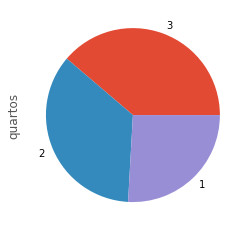

In [66]:
df["quartos"].value_counts().plot.pie()

Uma coisa a se notar do gráfico de scatter é a poluição causada pela enorme quantidade de dados agrupadas num dos cantos do gráfico, além de podermos diminuir o tamanho dos pontos passando o argumento `s` ao método `.scatter` podemos também usar um método do pandas que cria uma amostragem aleatória dos dados.

O `.sample` pode receber tanto um argumento `frac`, que determina uma fração dos itens que o método retornará (no caso abaixo, 10%), ou `n`, que determina um valor absoluto de itens.

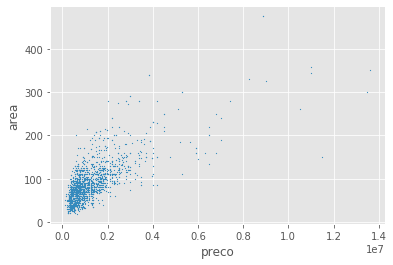

In [67]:
df.plot.scatter(x='preco', y='area', s=.5)

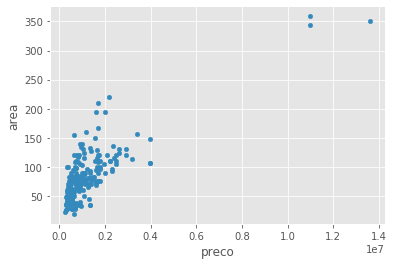

In [68]:
df.sample(frac=.1).plot.scatter(x='preco', y='area')

Finalmente, a tarefa de salvar seu DataFrame externamente para um formato específico é feita com a mesma simplicidade que a leitura de dados é feita no pandas, pode-se usar, por exemplo, o método `to_csv`, e o arquivo será criado com os dados do DataFrame:

In [69]:
df = pd.DataFrame({'Aluno' : ["Wilfred", "Abbie", "Harry", "Julia", "Carrie"],
                   'Faltas' : [3,4,2,1,4],
                   'Prova' : [2,7,5,10,6],
                   'Seminário': [8.5,7.5,9.0,7.5,8.0]})
df.to_csv("aulas.csv")

In [70]:
pd.read_csv("aulas.csv")

,Unnamed: 0,Aluno,Faltas,Prova,Seminário
0,0,Wilfred,3,2,8.5
1,1,Abbie,4,7,7.5
2,2,Harry,2,5,9.0
3,3,Julia,1,10,7.5
4,4,Carrie,4,6,8.0


Com o que foi abordado nesta introdução você já deve estar apto a fazer exploração e manipulação básica de dados com o **pandas**, para aprofundar mais aqui vão algumas referências:

 - [Documentação oficial](http://pandas.pydata.org/pandas-docs/stable/index.html)
 - [Coletânea de notebooks Jupyter que abordam profundamente várias ferramentas e casos de uso do Pandas
](https://github.com/donnemartin/data-science-ipython-notebooks#pandas)
 - [Exercícios de Pandas com soluções, separados por temas](https://github.com/guipsamora/pandas_exercises)
 